In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [16]:
#Ex 1.1
ising_1D = -np.ones(16)
energies = [[],[]], [1-D,2-D]
magnet = []
for i in range(np.power(2,16)):
    arr = -1*np.array((((i & (1 << np.arange(16)))) > 0).astype(int))
    arr[arr==0]=1
    magnet.append(np.sum(arr)/16)
    energies[0].append(-np.sum(arr*np.roll(arr, 1)))
    arr2 = arr.reshape(4,4)
    energies[1].append(-np.sum(arr2*(np.roll(arr2, 1, 0)+np.roll(arr2, 1, 1))))
    
    


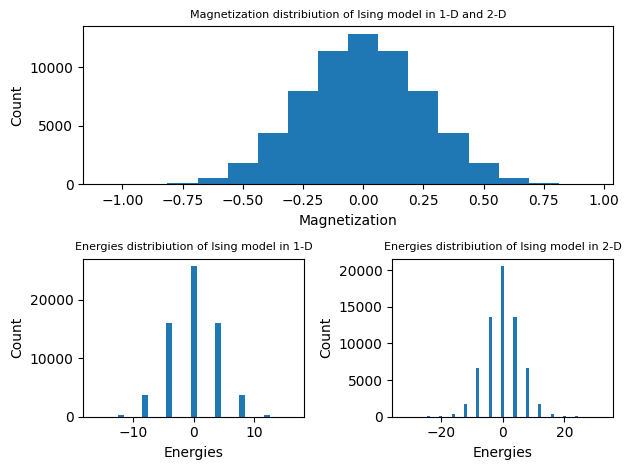

In [62]:
#Ex 1.2

fig = plt.figure(tight_layout=True)

ax = fig.add_subplot(2,1,1)
ax.hist(magnet, bins=np.arange(-1,1.1,1/8),align="left")
ax.set_ylabel('Count')
ax.set_xlabel('Magnetization')
ax.set_title('Magnetization distribiution of Ising model in 1-D and 2-D', fontsize=8)


hist = {}
for i in range(2):
    ax = fig.add_subplot(2,2,i+3)
    hist[i] = ax.hist(energies[i], bins=np.arange(-16-i*16,17.1+i*16,1),align="left")
    ax.set_ylabel('Count')
    ax.set_xlabel('Energies')
    ax.set_title('Energies distribiution of Ising model in %d-D' % (i+1), fontsize=8)
fig.align_labels()  
plt.show()



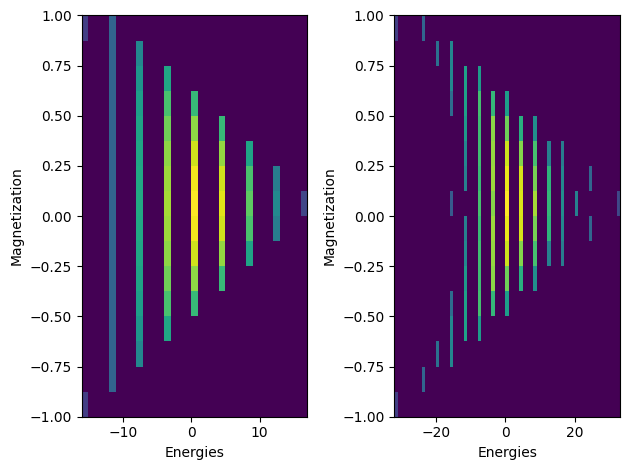

In [18]:
#Ex 1.3
import matplotlib.colors as mcolors

fig = plt.figure(tight_layout=True)
# fig = plt.figure(figsize=(7, 100))
for i in range(2):
    xedges = np.arange(-16-i*16,17.1+i*16,1)
    yedges = np.arange(-1,1.1,1/8)
    ax = fig.add_subplot(1,2,i+1)
    ax.hist2d(energies[i], magnet, (xedges,yedges), norm=mcolors.PowerNorm(0.2))
    ax.set_ylabel('Magnetization')
    ax.set_xlabel('Energies')

plt.show()



In [117]:
#Ex 1.4
#create tenperatures
T = np.arange(0.1,5,(5-0.1)/50)

#substruct ground state
norm_es = [[],[]]
for ind in [0,1]:
    for i,e in enumerate(energies[ind]):
        norm_es[ind].append(e-np.min(hist[ind][1])) 

#calculate partition function
z = [{},{}] ## [1-D,2-D]
for t in T:
    z[0][t] = np.sum(np.exp(-np.array(norm_es[0])/t))
    z[1][t] = np.sum(np.exp(-np.array(norm_es[1])/t))

#calculate probabilities
p=[{},{}] ##p[dimension][temperature][energy]
for ind in [0,1]:
    for t in T:
        p_t = []
        for i,e in enumerate(norm_es[ind]):
           p_t.append(np.exp(-e/t)/z[ind][t])
        p[ind][t] = p_t

#calculate energies
avg_e = [[],[]]
avg_e2 = [[],[]]
for i in range(2):
    for t in T:
        avg_e[i].append(np.sum(np.array(p[i][t])*np.array(norm_es[i])))
        avg_e2[i].append(np.sum(np.array(p[i][t])*np.array(norm_es[i])*np.array(norm_es[i])))
        

        


#calculate heat capacity
cv = [[],[]]
for i in range(2):
    for j,t in enumerate(T):
        cv[i].append((avg_e2[i][j]-(avg_e[i][j]*avg_e[i][j]))/(t*t))

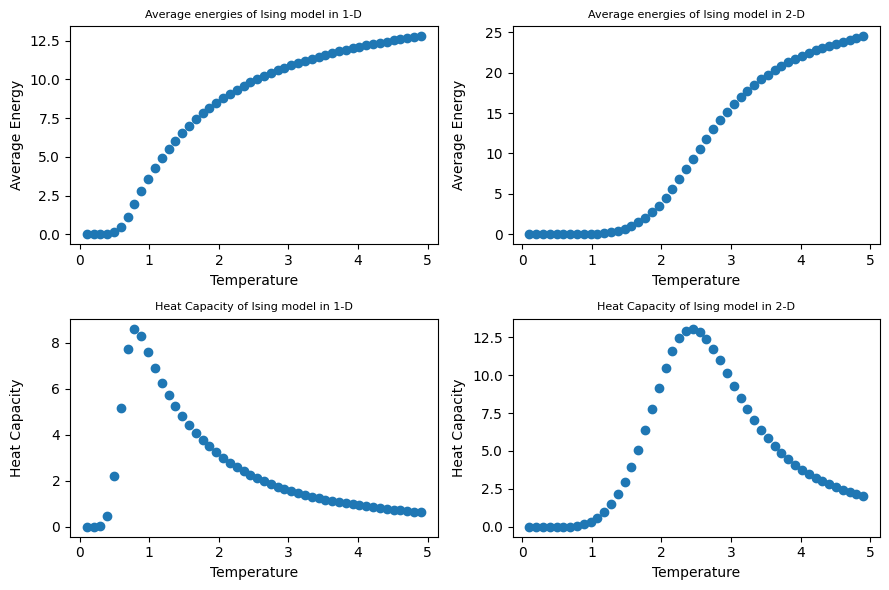

In [141]:
fig = plt.figure(figsize=(9, 6), tight_layout=True)

for i in range(2):
    ax = fig.add_subplot(2,2,i+1)
    ax.scatter(T, np.array(avg_e[i]))
    ax.set_ylabel('Average Energy')
    ax.set_xlabel('Temperature')
    ax.set_title('Average energies of Ising model in %d-D' % (i+1), fontsize=8)

for i in range(2):
    ax = fig.add_subplot(2,2,i+3)
    ax.scatter(T, np.array(cv[i]))
    ax.set_ylabel('Heat Capacity')
    ax.set_xlabel('Temperature')
    ax.set_title('Heat Capacity of Ising model in %d-D' % (i+1), fontsize=8)
fig.align_labels()  
plt.show()

In [4]:
#Ex 2.1
def delta_e(m0,S0):
    return 2*m0*S0

def calc_magnet(m):
    return np.sum(m)/(L*L)

def MCstep(m,t,L):
    i = np.random.randint(L)
    j = np.random.randint(L)
    S0 = m[(i - 1) % L, j] + m[(i + 1) % L, j] + m[i, (j - 1) % L] + m[i, (j + 1) % L]
    d_e = delta_e(m[i,j], S0)
    if(d_e < 0 or np.random.random() < np.exp(-d_e/t)):
        m[i,j] *= -1
    
    

In [75]:
magnet=[[],[],[]]
m = [[],[],[]]
L = 10
for j,t in enumerate([1.7,2.1,3.]):
    m[j] = np.random.choice([-1,1],L*L).reshape(L,L)
    for i in range(10**7):
        MCstep(m[j],t,L)
        if i%1000==0:
              magnet[j].append(calc_magnet(m[j]))

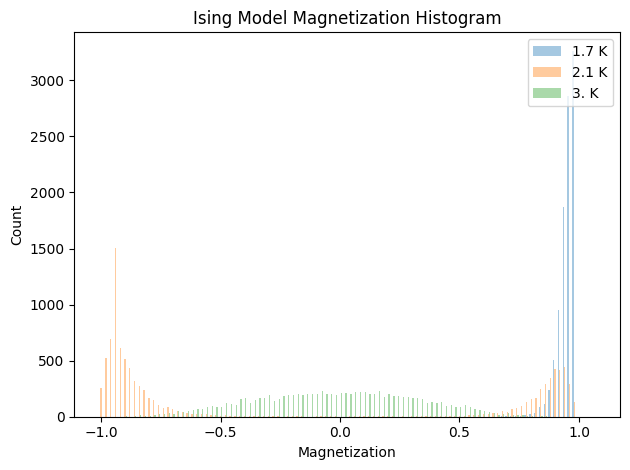

In [71]:
fig = plt.figure(tight_layout=True)
plt.hist([magnet[0],magnet[1],magnet[2]], bins=np.arange(-1,1.1,1/50), alpha=0.4, 
         label=["1.7 K","2.1 K","3. K"],align="left")
plt.legend(loc='upper right')
plt.title("Ising Model Magnetization Histogram")
plt.ylabel("Count")
plt.xlabel("Magnetization")
plt.show()


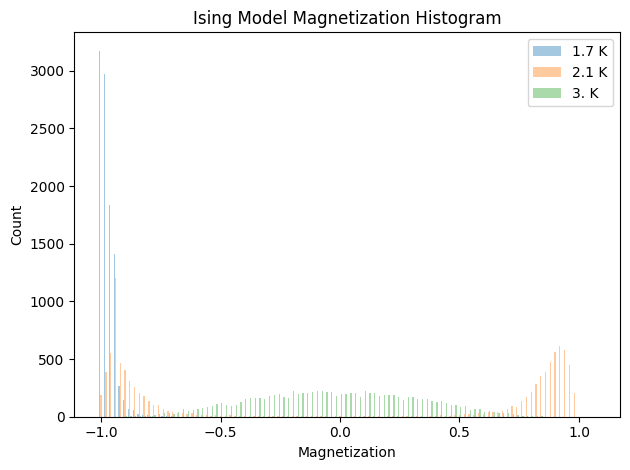

In [76]:
fig = plt.figure(tight_layout=True)
plt.hist([magnet[0],magnet[1],magnet[2]], bins=np.arange(-1,1.1,1/50), alpha=0.4, 
         label=["1.7 K","2.1 K","3. K"],align="left")
plt.legend(loc='upper right')
plt.title("Ising Model Magnetization Histogram")
plt.ylabel("Count")
plt.xlabel("Magnetization")
plt.show()

In [2]:
#Ex 2.2
def calc_energy(L,T):
    E = []
    for j,t in enumerate(T):
        E.append([])
        m = np.random.choice([-1,1],L*L).reshape(L,L)
        for i in range(10**6):
            E[j].append(-np.sum(m*(np.roll(m, 1, 0)+np.roll(m, 1, 1))))   
            MCstep(m,t,L)
    return E
        
def calc_E_Cv(E,T):
    avg_E, var, Cv =[], [], []
    for j,t in enumerate(T):
        avg_E.append(np.sum(E[j])/len(E[j]))
        var.append(np.sum((E[j]-avg_E[j])**2)/len(E[j]))
        Cv.append(np.array(var[j])/(t*t))   
    return avg_E, var, Cv


In [5]:
T = np.arange(1,5,0.1)
E4 = calc_energy(4,T)
avg_E4, var4, Cv4 =  calc_E_Cv(E4,T)
E8 = calc_energy(8,T)
avg_E8, var8, Cv8 =  calc_E_Cv(E8,T)

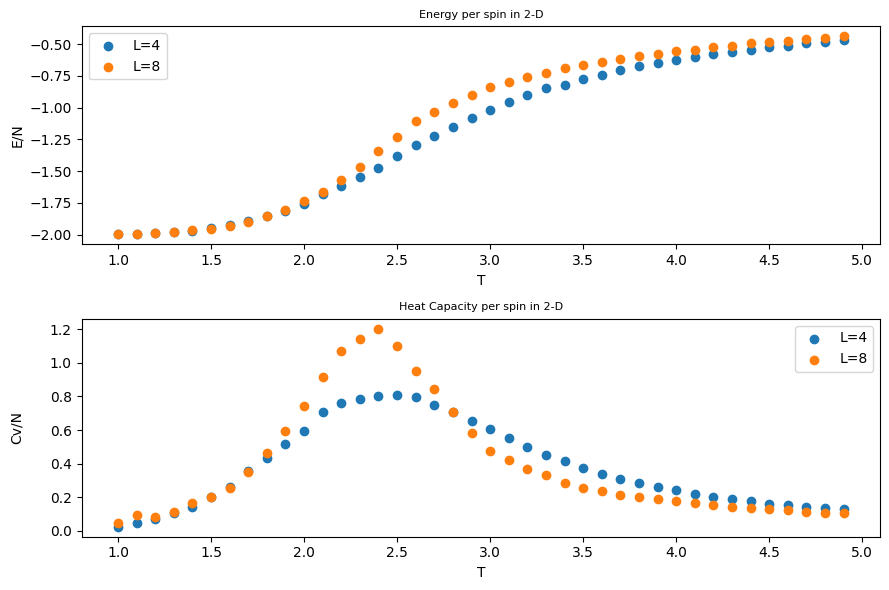

In [8]:
fig = plt.figure(figsize=(9, 6), tight_layout=True)

ax = fig.add_subplot(2,1,1)
ax.scatter(T,np.array(avg_E4)/16,label='L=4')
ax.scatter(T,np.array(avg_E8)/64,label='L=8')
ax.set_ylabel('E/N')
ax.set_xlabel('T')
ax.set_title('Energy per spin in 2-D', fontsize=8)
plt.legend()

ax = fig.add_subplot(2,1,2)
ax.scatter(T,np.array(Cv4)/16,label='L=4')
ax.scatter(T,np.array(Cv8)/64,label='L=8')
ax.set_ylabel('Cv/N')
ax.set_xlabel('T')
ax.set_title('Heat Capacity per spin in 2-D', fontsize=8)

plt.legend()
fig.align_labels()  
plt.show()